In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *
from plot_utils import *
configure_plot(plt)

In [3]:
def load_sim_output(sim_output_files):
    scenario_data = pd.DataFrame(columns=UNCERTAINTY_PARAMS_LIST+\
            ['res_tests_per_day', 'res_cornell_inf_10','res_cornell_inf_50','res_cornell_inf_90','res_ithaca_inf_10',
                'res_ithaca_inf_50','res_ithaca_inf_90'])

    for fname in sim_output_files:
        with open(fname, 'rb') as fhandle:
            [uncertainty_point, res_tests_per_day, res_inf_matrix, res_hosp_matrix] = dill.load(fhandle)

        new_row = dict()
        for index, col_name in enumerate(UNCERTAINTY_PARAMS_LIST):
            if type(uncertainty_point) == dict:
                new_row[col_name] = uncertainty_point[col_name]
            else:
                new_row[col_name] = uncertainty_point[index]
                
        new_row['res_tests_per_day'] = res_tests_per_day

        res_cornell_inf_quantiles, res_ithaca_inf_quantiles = get_stats(res_inf_matrix)
        new_row['res_cornell_inf_10'] = res_cornell_inf_quantiles[0]
        new_row['res_cornell_inf_50'] = res_cornell_inf_quantiles[1]
        new_row['res_cornell_inf_90'] = res_cornell_inf_quantiles[2]
        new_row['res_ithaca_inf_10'] = res_ithaca_inf_quantiles[0]
        new_row['res_ithaca_inf_50'] = res_ithaca_inf_quantiles[1]
        new_row['res_ithaca_inf_90'] = res_ithaca_inf_quantiles[2]

        scenario_data = scenario_data.append(new_row, ignore_index=True)
    return scenario_data

In [4]:
centre_sim_files = []
for i in range(64):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_centre_1624479750/point_{}.dill'.format(i)
    centre_sim_files.append(fname)
[centre_test_policies] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_centre_1624479750/test_policies.dill', mode='rb'))

centre_equal_sim_files = []
for i in range(64):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_centre_equal_1624479750/point_{}.dill'.format(i)
    centre_equal_sim_files.append(fname)
[centre_equal_test_policies] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_centre_equal_1624479750/test_policies.dill', mode='rb'))

pess_sim_files = []
for i in range(64):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_pess_1624479750/point_{}.dill'.format(i)
    pess_sim_files.append(fname)
[pess_test_policies] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_pess_1624479750/test_policies.dill', mode='rb'))

pess_equal_sim_files = []
for i in range(64):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_pess_equal_1624479750/point_{}.dill'.format(i)
    pess_equal_sim_files.append(fname)
[pess_equal_test_policies] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/test_pareto_pess_equal_1624479750/test_policies.dill', mode='rb'))

centre_data = load_sim_output(centre_sim_files)
centre_equal_data = load_sim_output(centre_equal_sim_files)
pess_data = load_sim_output(pess_sim_files)
pess_equal_data = load_sim_output(pess_equal_sim_files)
# centre_data, pess_data

In [7]:
# def get_tests_per_day(test_policy, params_list):
#     assert len(test_policy) == len(params_list)
#     tests_per_day = 0
#     for index, params in enumerate(params_list):
#         tests_per_day += np.ceil(params['population_size'] * test_policy[index])
#     return tests_per_day

# centre_tests_per_day = list()
# for policy in centre_test_policies:
#     centre_tests_per_day.append(get_tests_per_day(policy))

# centre_equal_tests_per_day = list()
# for policy in centre_equal_test_policies:
#     centre_equal_tests_per_day.append(get_tests_per_day(policy))

# pess_tests_per_day = list()
# for policy in pess_test_policies:
#     pess_tests_per_day.append(get_tests_per_day(policy))

# pess_equal_tests_per_day = list()
# for policy in pess_equal_test_policies:
#     pess_equal_tests_per_day.append(get_tests_per_day(policy))

TypeError: get_tests_per_day() missing 1 required positional argument: 'params_list'

In [5]:
# import itertools as it
# groups_tested_2x_week = list()
# for ngroups in range(7):
#     for entry in it.combinations(range(6), ngroups):
#         groups_tested_2x_week.append(entry)

# test_policies = list()
# for groups_tested in groups_tested_2x_week:
#     baseline_policy = [1/7,1/7,1/7,1/7,1/7,1/7,1/30,0]
#     for group in groups_tested:
#         baseline_policy[group] = 2/7
#     test_policies.append(baseline_policy)
    

for index, policy in enumerate(centre_test_policies):
    if policy == [2/7,2/7,1/7,1/7,2/7,1/7,1/30,0]:
        res_policy_index = index
res_policy_index

24

In [22]:
# pess_data.sort_values('res_cornell_inf_50', ascending='True').head(50)
centre_test_policies[23], centre_test_policies[24]

([0.2857142857142857,
  0.2857142857142857,
  0.14285714285714285,
  0.2857142857142857,
  0.14285714285714285,
  0.14285714285714285,
  0.03333333333333333,
  0],
 [0.2857142857142857,
  0.2857142857142857,
  0.14285714285714285,
  0.14285714285714285,
  0.2857142857142857,
  0.14285714285714285,
  0.03333333333333333,
  0])

In [47]:
combined_df = centre_data[['res_tests_per_day','res_cornell_inf_10', 'res_cornell_inf_50', 'res_cornell_inf_90']].rename(columns={'res_tests_per_day': 'centre_tests_per_day', 'res_cornell_inf_10': 'centre_inf_10', 'res_cornell_inf_50': 'centre_inf_50', 'res_cornell_inf_90': 'centre_inf_90'}).join(pess_data[['res_tests_per_day','res_cornell_inf_10', 'res_cornell_inf_50', 'res_cornell_inf_90']].rename(columns={'res_tests_per_day': 'pess_tests_per_day', 'res_cornell_inf_10': 'pess_inf_10', 'res_cornell_inf_50': 'pess_inf_50', 'res_cornell_inf_90': 'pess_inf_90'}))

def get_pareto_data(df, res_policy_index):

    return_df = pd.DataFrame(columns = df.columns)
    best_inf = np.inf
    current_index = 0
    
    for index, row in df.sort_values('pess_tests_per_day', ascending=True).iterrows():
    #     print(index, row['res_cornell_inf_50'])
        if (row['pess_inf_50'] < best_inf) or (index == res_policy_index):
#             tests_per_day.append(row['res_tests_per_day'])
#             inf_10.append(row['res_cornell_inf_10'])
#             inf_50.append(row['res_cornell_inf_50'])
#             inf_90.append(row['res_cornell_inf_90'])
            best_inf = row['pess_inf_50']
            return_df = return_df.append(row)
            current_index += 1
        if index == res_policy_index:
            selected_policy_index = current_index - 1
    return return_df, selected_policy_index

pareto_df, selected_policy_index = get_pareto_data(combined_df, res_policy_index)

In [16]:
# def get_pareto_data(df, res_policy_index):

#     tests_per_day = list()
#     inf_10 = list()
#     inf_50 = list()
#     inf_90 = list()
#     best_inf = 10000000
    
#     for index, row in df.sort_values('res_tests_per_day', ascending=True).iterrows():
#     #     print(index, row['res_cornell_inf_50'])
#         if (row['res_cornell_inf_50'] < best_inf) or (index == res_policy_index):
#             tests_per_day.append(row['res_tests_per_day'])
#             inf_10.append(row['res_cornell_inf_10'])
#             inf_50.append(row['res_cornell_inf_50'])
#             inf_90.append(row['res_cornell_inf_90'])
#             best_inf = row['res_cornell_inf_50']
#         if index == res_policy_index:
#             selected_policy_index = len(tests_per_day)
#     return tests_per_day, np.array(inf_10), np.array(inf_50), np.array(inf_90), selected_policy_index

# combined_df = centre_data[['res_tests_per_day','res_cornell_inf_10', 'res_cornell_inf_50', 'res_cornell_inf_90']].rename(columns={'res_tests_per_day': 'centre_tests_per_day', 'res_cornell_inf_10': 'centre_inf_10', 'res_cornell_inf_50': 'centre_inf_50', 'res_cornell_inf_90': 'centre_inf_90'}).join(pess_data[['res_tests_per_day','res_cornell_inf_10', 'res_cornell_inf_50', 'res_cornell_inf_90']].rename(columns={'res_tests_per_day': 'pess_tests_per_day', 'res_cornell_inf_10': 'pess_inf_10', 'res_cornell_inf_50': 'pess_inf_50', 'res_cornell_inf_90': 'pess_inf_90'}))

# center_tests_per_day, center_inf_10, center_inf_50, center_inf_90, center_selected_policy_index = get_pareto_data(centre_data, res_policy_index)
# pess_tests_per_day, pess_inf_10, pess_inf_50, pess_inf_90, pess_selected_policy_index = get_pareto_data(pess_data, res_policy_index)
# center_tests_per_day[center_selected_policy_index], center_inf_50[center_selected_policy_index], center_selected_policy_index

(5848.409523809523, 166.0, 12)

In [59]:
# centre_data.sort_values('res_tests_per_day', ascending=True)[['res_tests_per_day', 'res_cornell_inf_50']].head(50)
# pareto_df
list(pareto_df['centre_tests_per_day'])[selected_policy_index] #, pareto_df['centre_inf_50'][selected_policy_index]

5804.123809523809

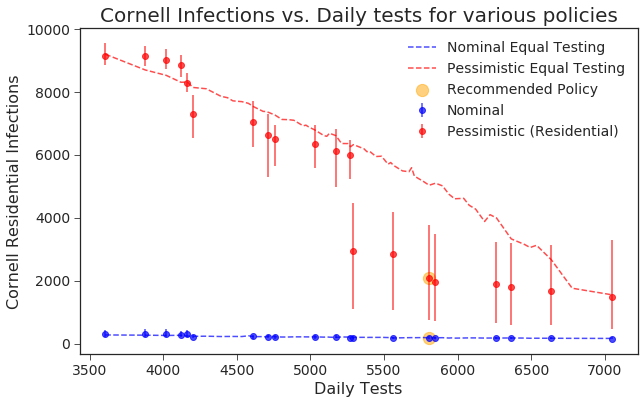

In [61]:
# selected_policy_index = 3

f, axs = plt.subplots(1,1,sharex=True,figsize=(10,6))

plt.subplot(1,1,1)
plt.errorbar(x='centre_tests_per_day', y='centre_inf_50', yerr = [pareto_df['centre_inf_50'] - pareto_df['centre_inf_10'], pareto_df['centre_inf_90'] - pareto_df['centre_inf_50']], data=pareto_df, fmt='o', label='Nominal', c='blue', alpha=0.7)
plt.scatter(x=list(pareto_df['centre_tests_per_day'])[selected_policy_index], y=list(pareto_df['centre_inf_50'])[selected_policy_index],c='orange',s=150,alpha=0.5, label='Recommended Policy')

plt.errorbar(x='pess_tests_per_day', y='pess_inf_50', yerr = [pareto_df['pess_inf_50'] - pareto_df['pess_inf_10'], pareto_df['pess_inf_90'] - pareto_df['pess_inf_50']], data=pareto_df, fmt='o', label='Pessimistic (Residential)', c='red', alpha=0.7)
plt.scatter(x=list(pareto_df['pess_tests_per_day'])[selected_policy_index], y=list(pareto_df['pess_inf_50'])[selected_policy_index],c='orange',s=150,alpha=0.5)

plt.plot('res_tests_per_day', 'res_cornell_inf_50', '--', data=centre_equal_data.sort_values('res_tests_per_day', ascending=True), c='blue', alpha=0.7, label='Nominal Equal Testing')
plt.plot('res_tests_per_day', 'res_cornell_inf_50', '--', data=pess_equal_data.sort_values('res_tests_per_day', ascending=True), c='red', alpha=0.7, label='Pessimistic Equal Testing')

# text_x = [300, -1000, -1250, -500, -500, 0, 0, -200, 0]
# text_y = [0, 1500, -1000, 1000, -1500, 500, 600, 450, -700]
# for index in range(len(text_x)):
#     plt.annotate(plotting_data['test_policy'][index], xy = (plotting_data['daily_tests'][index], plotting_data['cornell_inf'][index]), xycoords = 'data', xytext=(plotting_data['daily_tests'][index] + text_x[index], plotting_data['cornell_inf'][index] + text_y[index]), textcoords = 'data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.title('Cornell Infections vs. Daily tests for various policies')
plt.ylabel('Cornell Residential Infections')
plt.xlabel('Daily Tests')
plt.legend()
# plt.ylim([0,6000])

plt.show()

# plt.savefig('res_inst_paper_graphs/mar_19_graphs/testing_policies_pareto.png', dpi=450)